# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The TMDb data set contains information for 10,865 movies from "The Movie Database" website. The data includes the following columns. Any columns with "all" in the description are separated by | pipes.

* budget (total film budget)
* budget_adj (total film budget in 2010 dollars)
* cast (all film cast members of the film)
* director (all directors of the film)
* genres (all genres of the film)
* homepage (web page for the movie)
* id (TMDb database id)
* imdb_id (IMDb database id)
* keywords (all keywords)
* popularity (popularity score)
* overview (brief summary describing the movie's story)
* original_title (original title of the movie)
* production_companies (all production companies)
* release_date (release date including month/day/year)
* release_year (release year)
* revenue (total revenue in actual dollars)
* revenue_adj (total revenue in 2010 dollars)
* runtime (film runtime in minutes)
* tagline (brief phrase relating to plot to generate buzz about the movie)
* vote_average (average user rating)
* vote_count (total number of user votes)

### Question for Analysis: What traits predict a film has a higher chance of being a "blockbuster"?
The purpose of this analysis is determining whether blockbuster films have traits correlated with high revenue. I will define a "blockbuster" as \\$1 billion or higher in the adjusted revenue column (revenue_adj) and a "mega" blockbuster as \\$2 billion or higher in adjusted revenue.

### Loading necessary libraries

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### Loading TMDb data and taking a peek at the data

In [88]:
# import TMDb movie data csv
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
# print out first few lines of TMDb data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Checking data shape (# of rows and columns)

In [164]:
df.shape # (rows, cols)

(10865, 21)

### Checking data types of columns, and # of non-null values

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 10866 entries, 0 to 10865
,Data columns (total 21 columns):
, #   Column                Non-Null Count  Dtype  
,---  ------                --------------  -----  
, 0   id                    10866 non-null  int64  
, 1   imdb_id               10856 non-null  object 
, 2   popularity            10866 non-null  float64
, 3   budget                10866 non-null  int64  
, 4   revenue               10866 non-null  int64  
, 5   original_title        10866 non-null  object 
, 6   cast                  10790 non-null  object 
, 7   homepage              2936 non-null   object 
, 8   director              10822 non-null  object 
, 9   tagline               8042 non-null   object 
, 10  keywords              9373 non-null   object 
, 11  overview              10862 non-null  object 
, 12  runtime               10866 non-null  int64  
, 13  genres                10843 non-null  object 
, 14  production_companies  9836 non-null   object 
, 15 

I'm skeptical that 64 bit values are needed for every column currently using them.

### Checking the number of unique values

In [91]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Check stats including counts, min/max, average values

In [92]:
# setting pandas to display in standard notation for readability
pd.options.display.float_format = '{:.2f}'.format

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


### Data Cleaning: Data Type Correction - Reduces Memory Usage

Several data types have maximum values which far exceed the maximum values present in the data. Replacing these with more appropriate data types saves space in memory. This data set is small enough this likely won't matter, but it would be useful in a large dataset. 

A little info about the data types we are using to replace the current types.

uint32 ranges from 0 to 4,294,967,295, uint16 ranges from 0 to 65,535, float32 supports ~7 significant digits.

Other common problems in the data include the following. 
* Duplicate rows
* Missing values in the columns: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies
* Zero values in the columns: budget, budget_adj, revenue, revenue_adj, runtime

Due to the informational nature of the dataset, none of the missing or zero values can be adjusted in a way that benefits analysis, but duplicate rows will be removed.

### uint32 is sufficient for revenue, adjustments could be needed within a decade

In [ ]:
# originally set to int64 - changing to uint32
df['budget'] = df['budget'].astype('uint32')

### uint32 is sufficient for: id, budget

In [23]:
# originally set to int64 - changing to uint32
df['id'] = df['id'].astype('uint32')
df['budget'] = df['budget'].astype('uint32')

### uint16 is sufficient for: runtime, release_year, vote_count

In [22]:
# originally set to int64 - changing to uint16
df['runtime'] = df['runtime'].astype('uint16')
df['release_year'] = df['release_year'].astype('uint16')
df['vote_count'] = df['vote_count'].astype('uint16')

### float32 is large enough for popularity and vote_average

In [93]:
# originally set to float64 - changing to float32
df['popularity'] = df['popularity'].astype('float32')
df['vote_average'] = df['vote_average'].astype('float32')

### Removing duplicate rows

In [136]:
# drop duplicates in existing data frame (df)
df.drop_duplicates(inplace=True)
# Confirming number of rows after deduplication
df.count().max()

10865

There was only a single duplicate row.

### Filtering out rows with no revenue_adj data
Films with zero values in the revenue_adj should be excluded. In order for a movie to be included or excluded as a "high revenue" film, we must only include films which can be compared on the same terms - 2010 inflation adjusted dollars.

In [94]:
filtered_df = df.query('revenue_adj > 0')

This filters out all movies without revenue_adj numbers.

### Check how many movies have a run time over 200 minutes

In [138]:
filtered_df.query('runtime > 200').count().max()

10

There are only 10 movies with runtimes longer than 200 minutes. Since there are only 10 samples out of several thousand, we can't make any reasonable conclusions about these outliers.

In [96]:
filtered_df_rt = filtered_df.query('runtime <= 200') # filtering to movies with 200 minute or less runtime

### Check number of remaining rows in filtered data

In [139]:
filtered_df_rt.count().max()

4839

This is a large reduction and is very close to the number of unique values in the revenue_adj column, as expected. A small difference is logical - there is no reason different movies cannot have the same amount of revenue.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question: What traits predict a film has a higher chance of being a "blockbuster"?

### Overview of Filtered Data

In [101]:
filtered_df_rt.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4839.00,4839.00,4839.00,4839.00,4839.00,4839.00,4839.00,4839.00,4839.00,4839.00
mean,44577.21,1.04,29568620.84,89118441.30,107.61,435.76,6.15,2000.94,35089421.98,114812365.73
std,72310.50,1.36,40540033.98,161548246.89,18.45,803.72,0.80,11.55,43671041.42,198144981.34
min,5.00,0.00,0.00,2.00,15.00,10.00,2.10,1960.00,0.00,2.37
25%,8290.00,0.39,1650000.00,7716162.50,95.00,46.50,5.60,1994.00,2319150.03,10463697.92
50%,12155.00,0.68,15000000.00,31853080.00,104.00,147.00,6.20,2004.00,20328008.68,43956661.16
75%,44024.50,1.21,40000000.00,99982876.50,117.00,435.00,6.70,2010.00,49707425.00,131288137.74
max,417859.00,32.99,425000000.00,2781505847.00,200.00,9767.00,8.40,2015.00,425000000.00,2827123750.41


In [152]:
# function to create plots without repeating as much code ... x is the df col for x-axis, y is the df col for y-axis,
# style is to determine std or sci notation, and style_axis is which axis to apply the style on, label_rot_axis is
# which access to rotate the labels for values and label_rot_amount is the number of degrees to rotate the label
def create_plot(df, x, y, kind, style, style_axis, label_rot_axis, label_rot_amount):
    ax = df.plot(x=x, y=y, kind=kind)
    # change values to standard notation
    ax.ticklabel_format(axis=style_axis, style=style)
    # need to rotate labels because numbers bunch together
    ax.tick_params(axis=label_rot_axis, rotation=label_rot_amount) 
    return ax

### Using a scatterplot to check for a relationship between adjusted revenue and runtime

<AxesSubplot: xlabel='runtime', ylabel='revenue_adj'>

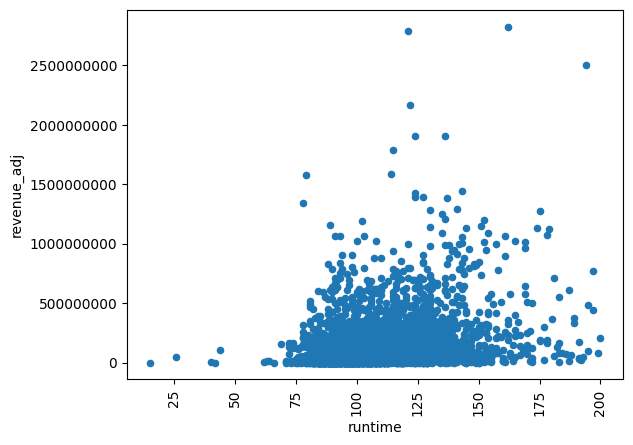

In [150]:
# create a scatter plot with runtime on the x-axis and adjusted revenue on the y-axis, vals in standard notation
create_plot(filtered_df_rt, 'runtime', 'revenue_adj', 'scatter', 'plain', 'both', 'x', 90)

The scatterplot shows most of the movies with at least \\$1 billion of revenue are 120 minutes or longer, and all movies over \\$2 billion in revenue are at least 120 minutes long. As you can see, there are plenty of movies of 120 minutes or longer which don't have revenues over \\$1 billion - it's important not to misinterpret what I'm saying to mean "120 minutes or longer guarantees a blockbuster".

### Verifying the relationship between run time and adjusted revenue

#### Count of movies over 120 minutes long with at least \\$1 billion in revenue.

In [134]:
# filter by runtime >= 120 and revenue_adj >= $ 1 billion
filtered_df_rt.query('runtime >= 120').query('revenue_adj >= 1000000000').count().max()

32

#### Count of movies under 120 minutes long with at least \\$1 billion in revenue

In [135]:
# filter by runtime < 120 and revenue_adj >= $ 1 billion
filtered_df_rt.query('runtime < 120').query('revenue_adj >= 1000000000').count().max()

11

#### Shortest runtime of a "mega" blockbuster

In [140]:
# grab min value in runtime column, while filtering by revenue of at least $2 billion
filtered_df_rt.query('revenue_adj >= 2000000000')['runtime'].min()

121

The above shows a clearly defined relationship between runtime and high revenue.
* 32 movies with a run time longer than 120 minutes were blockbusters.
* Only 11 movies with a run time shorter than 120 minutes were blockbusters.
* The shortest run time for a "mega" blockbuster was 121 minutes.

### Using a scatterplot to look for a relationship between adjusted budget and adjusted revenue

<AxesSubplot: xlabel='budget_adj', ylabel='revenue_adj'>

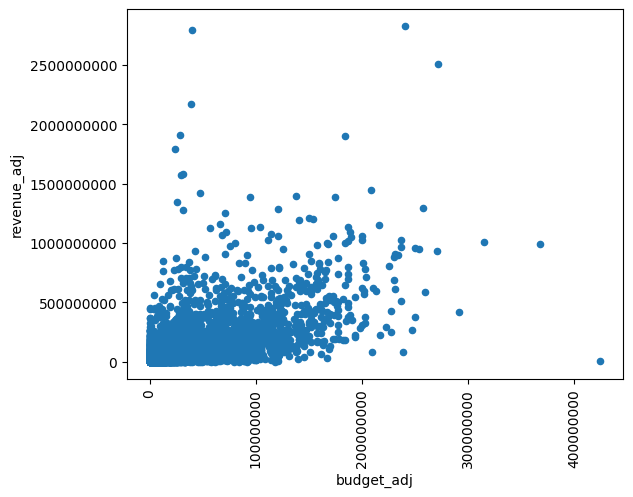

In [156]:
# create a scatter plot with x-axis being the adjusted budget and y-axis being the adjusted revenue
create_plot(filtered_df_rt, 'budget_adj', 'revenue_adj', 'scatter', 'plain', 'both', 'x', 90)


The scatterplot above shows the relationship between adjusted budget and adjusted revenue is strong. We can verify this with the following code, comparing the number of blockbusters with budgets under \\$50 million and over \\$50 million. As with long runtimes, it's important to understand a high budget does not guarantee a blockbuster, it only increases the chances.

In [163]:
filtered_df_rt.query('budget_adj <= 50000000').query('revenue_adj >= 1000000000').count().max() # movies with a budget under $140 mil

9

In [162]:
filtered_df_rt.query('budget_adj > 50000000').query('revenue_adj >= 1000000000').count().max() # movies with a budget over $140 mil

34

This data confirms what we're seeing on the scatterplot. 34 movies with budgets of at least \\$50 million were blockbusters, while only 9 with budgets under \\$50 million were blockbusters.

### What if we create a bubble chart using budget as the third variable (3D)?

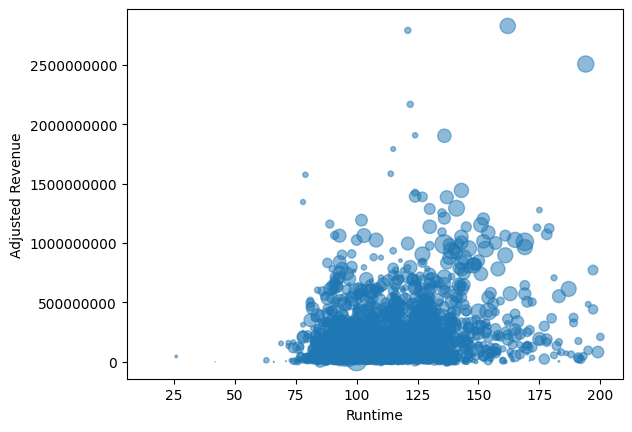

In [210]:
# Creates a bubble chart with runtime as x axis, revenue_adj as y axis, budget_adj as z axis which determines bubble size
# in conjunction with the multiplier. Since the budget numbers are very large, we must use a very small multiplier to
# prevent the bubbles from filling the entire chart space ... alpha determines opacity of the bubbles
plt.scatter(filtered_df_rt['runtime'], filtered_df_rt['revenue_adj'], s=filtered_df_rt['budget_adj']*.0000005, alpha=0.5)
# change values to standard notation
plt.ticklabel_format(style='plain', axis='both')
plt.xlabel('Runtime')
plt.ylabel('Adjusted Revenue')
# show the bubble chart
plt.show()

The bubble chart above shows the following.
* The bigger the bubble, the larger the budget.
* A high budget and long runtime maximizes the chance a film will become a blockbuster.
* A short run time decreases the chance a film will become a blockbuster, even when the budget is high.
* A low budget decreases the chance a film will become a blockbuster, even when the run time is high.

In [123]:
filtered_df_rt.query('revenue_adj >= 1000000000').query('budget_adj >= 50000000').query('runtime < 120').count().max()

7

In [124]:
filtered_df_rt.query('revenue_adj >= 1000000000').query('budget_adj >= 50000000').query('runtime >= 120').count().max()

27

In [126]:
filtered_df_rt.query('revenue_adj >= 1000000000').query('budget_adj < 50000000').query('runtime < 120').count().max()

4

In [127]:
filtered_df_rt.query('revenue_adj >= 1000000000').query('budget_adj < 50000000').query('runtime >= 120').count().max()

5

The above code confirms what we're seeing in the bubble chart by telling us the following.
* 27 movies with high budgets and long run time were blockbusters.
* 7 movies with high budgets and short run time were blockbusters.
* 5 movies with low budgets and long run time were blockbusters.
* 4 movies with low budgets and short run time were blockbusters.

### How many films have a budget of at least \\$50 million and a runtime of at least 120 minutes?

In [168]:
filtered_df.query('budget_adj >= 50000000').query('runtime >= 120').count().max() ## output count of big budget films

485

485 films have at least \\$50 million in the budget and a runtime of at least 120 minutes.

### A 1D investigation: How many movies are blockbusters?

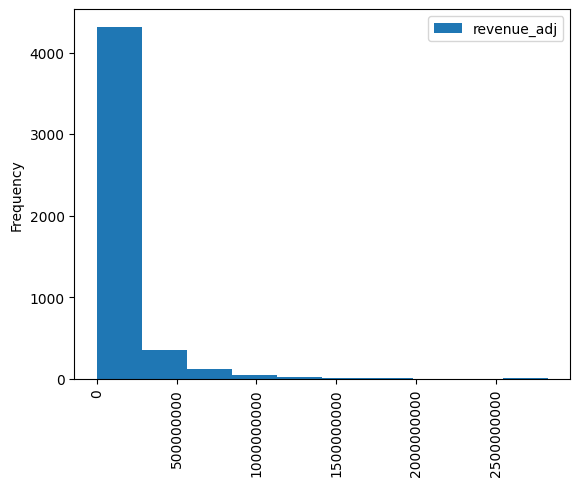

In [212]:
# create a histogram with frequency buckets for different revenue amounts
ax = filtered_df.plot(y='revenue_adj', kind='hist')
# style plain changes values to std notation
ax.ticklabel_format(axis='both', style='plain')
# need to rotate labels because numbers bunch together
ax.tick_params(axis='x', rotation=90)

The histogram above shows very few films reach over \\$1 billion in revenue. The vast majority don't even reach \\$500 million. The code below will give us an exact number.

In [213]:
filtered_df.query('revenue_adj >= 1000000000').count().max() ## output count of blockbuster films

44

There are only 44 blockbuster films in the data set.

<a id='conclusions'></a>
## Conclusions
My conclusion is simple. Films with high budgets and long run times have a higher *chance* of becoming a blockbuster. When either factor is reduced, it's less likely the film will be a blockbuster. This is clear from looking at the bubble chart and statistics output following the chart.

It's notable that among 485 films with large budgets and a long runtime, only 44 were blockbusters. It's important to understand that is still only a 9% chance, but the rate of success is still higher compared to films which don't have a big budget and long runtime.

<a id='limitations'></a>
## Limitations 
The data set is limited to movies created prior to 2016. Due to advancements in technology, particularly recent advancements in AI, the trend of needing a high budget might shift.

An additional limitation is the lack of comparison between older and newer films, which could impact the results. Additional research could be done to see whether this trend is accurate for both older and newer films.

There might be outliers in films with short run times, which I did not take into consideration for this exercise.